# PHYS20762 - Variances in Monte Carlo Calculations

(c) Hywel Owen  
University of Manchester  
5th May 2020

In this notebook we look at calculating the variances of various random sample sets.

First, we load the regular packages into Python:

In [2]:
# Uncomment the line below to be able to spin all the plots.
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## Flipping a Coin

We here create a virtual 'coin toss'. First, we define a function that flips our virtual coin and tells us 'True' if it's heads and 'False' if it's tails:

In [4]:
def coin_flip():
    return True if np.random.random() > 0.5 else False

coin_flip()

True

We can test our **coin_flip()** function 'flipping' our coin and printing the result:

In [5]:
for i in range(10):
    print(coin_flip())

False
True
True
False
True
True
True
False
True
False


Now let's make another similar function that *tallies* up how many heads we get from $n$ coin tosses, using our **coin_flip()** function:

In [6]:
def n_coin_flips(n):
    return sum([1 if coin_flip() else 0 for i in range(n)])

n_coin_flips(100)

46

We can now use this function to create a set of $m$ coin-toss experiments, each with $n$ coin flips:

In [7]:
def m_coin_flip_experiments(m,n):
    return [n_coin_flips(n) for i in range(m)]

m_coin_flip_experiments(10,100)

[55, 49, 47, 55, 46, 62, 54, 49, 46, 53]

We can now histogram these to see the distribution in the number of heads we expect. We do 1000 experiments, each of 100 coin tosses:

(array([  16.,  158.,  784., 2152., 2304., 2763., 1382.,  374.,   58.,
           9.]),
 array([32. , 35.8, 39.6, 43.4, 47.2, 51. , 54.8, 58.6, 62.4, 66.2, 70. ]),
 <a list of 10 Patch objects>)

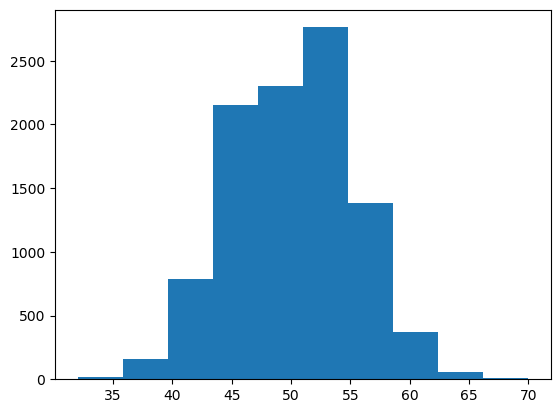

In [8]:
plt.hist(m_coin_flip_experiments(10000,100))

We see that the expectation value of the number of heads is as we expect:

In [7]:
np.mean(m_coin_flip_experiments(10000,100))

50.0434

We can also calculate the variance:

In [8]:
np.var(m_coin_flip_experiments(10000,100))

25.010910040000002

The correct binomial variance should be $n p (1-p)$, where $n$ is the number of coin tosses in each experiment, and $p=0.5$ is the probability in each toss of getting a head:

In [9]:
n = 100
p = 0.5
var_estimate = n*p*(1-p)
std_estimate = np.sqrt(var_estimate)
print(var_estimate)
print(std_estimate)

25.0
5.0


So, our binomial estimate is correct. In the case of the simple coin toss, using a Poisson approximation, i.e. $\mu = var = \lambda$ is no good:

In [10]:
n = 100
p = 0.5
mu = n*p
# Note, in Python we are not allowed to the use the word 'lambda' as it is reserved
lamb = mu
var_estimate = lamb # Estimating the variance from the mean, assuming a Poisson distribution
std_estimate = np.sqrt(var_estimate) # Estimating the standard deviation
print(var_estimate)
print(std_estimate)

50.0
7.0710678118654755


We can't use the Normal approximation to a Poisson, which would be essentially the same calculation. But we see that our incorrect estimates are at least *over-estimates* on our uncertainty:

In [11]:
n = 100
p = 0.5
mu = n*p
std_estimate = np.sqrt(mu) # Estimating the standard deviation assuming it's Normal
print(std_estimate)

7.0710678118654755


## Flipping a Coin with a Small Head

Let's change our coin toss experiment, and imagine a coin with a small probability $p = 0.1$ of being a head. We re-write our coin toss functions with this new probability. Let's first try it with:

$p = 0.1$  
$n = 100$  
$m = 100000$   

(array([2.0500e+02, 2.2490e+03, 1.8203e+04, 2.4735e+04, 3.4766e+04,
        1.2608e+04, 6.2300e+03, 7.8600e+02, 2.0400e+02, 1.4000e+01]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

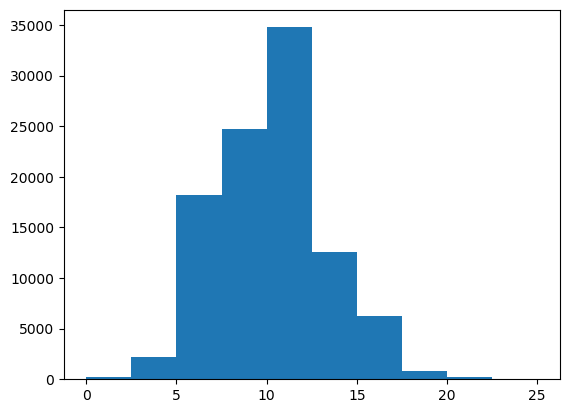

In [10]:
def coin_flip(p):
    return True if np.random.random() < p else False

def n_coin_flips(n,p):
    return sum([1 if coin_flip(p) else 0 for i in range(n)])

def m_coin_flip_experiments(m,n,p):
    return [n_coin_flips(n,p) for i in range(m)]

plt.hist(m_coin_flip_experiments(100000,100,0.1))

We see that the mean is close to the expectation value $\mu = np$ that we expect:

In [20]:
np.mean(m_coin_flip_experiments(10000,100,0.1))

10.0266

Because $p$ is small, the variance is now reasonably Poisson distributed, so that $var \simeq \mu$: 

In [19]:
np.var(m_coin_flip_experiments(10000,100,0.1))\

9.131807190000002

We can there now use our Poisson/Gaussian approximation:

In [18]:
n = 100
p = 0.1
mu = n*p
# Note, in Python we are not allowed to the use the word 'lambda' as it is reserved
lamb = mu
var_estimate = lamb # Estimating the variance from the mean, assuming a Poisson distribution
std_estimate = np.sqrt(var_estimate) # Estimating the standard deviation
print(var_estimate)
print(std_estimate)

10.0
3.1622776601683795
